# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict.Supervised
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-01-22 14:57:46--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-01-22 14:57:46--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_f

In [7]:
df = pd.read_csv('pubchem_fp_acetylcholinesterase_bioactivity_data_3class_pIC50.csv')

In [8]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [9]:
# Examine X dimension
X.shape

(6368, 881)

In [10]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(6368, 145)

In [11]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [11:15<00:10, 10.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 145
[LightGBM] [Info] Start training from score 5.817427


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [11:16<00:00, 16.10s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [13:58<00:14, 14.72s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 145
[LightGBM] [Info] Start training from score 5.817427


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [13:59<00:00, 19.99s/it]


In [14]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.88,0.88,0.53,0.27
ExtraTreeRegressor,0.88,0.88,0.53,0.26
ExtraTreesRegressor,0.88,0.88,0.53,17.16
GaussianProcessRegressor,0.88,0.88,0.53,70.28
RandomForestRegressor,0.84,0.85,0.60,14.47
XGBRegressor,0.83,0.84,0.63,0.67
BaggingRegressor,0.83,0.83,0.63,1.54
MLPRegressor,0.80,0.80,0.69,16.15
HistGradientBoostingRegressor,0.67,0.68,0.87,3.50


In [16]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.42,0.49,1.15,12.67
HistGradientBoostingRegressor,0.41,0.48,1.15,3.00
XGBRegressor,0.40,0.47,1.16,0.75
LGBMRegressor,0.40,0.47,1.17,1.11
BaggingRegressor,0.39,0.46,1.18,1.68
SVR,0.36,0.44,1.20,4.76
NuSVR,0.36,0.43,1.21,3.58
KNeighborsRegressor,0.34,0.42,1.22,0.22
MLPRegressor,0.32,0.39,1.25,15.51


## **5. Data visualization of model performance**

[(0.0, 1.0)]

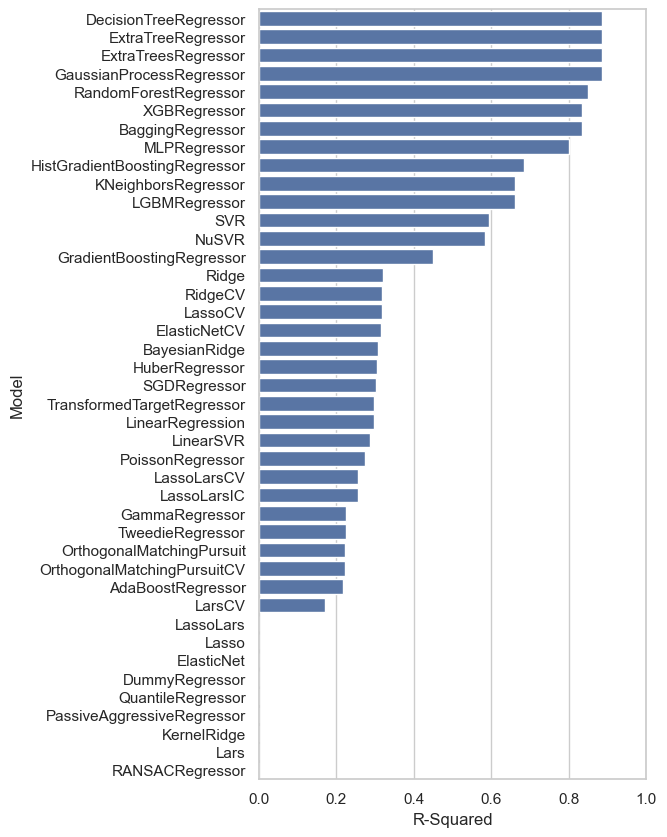

In [19]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

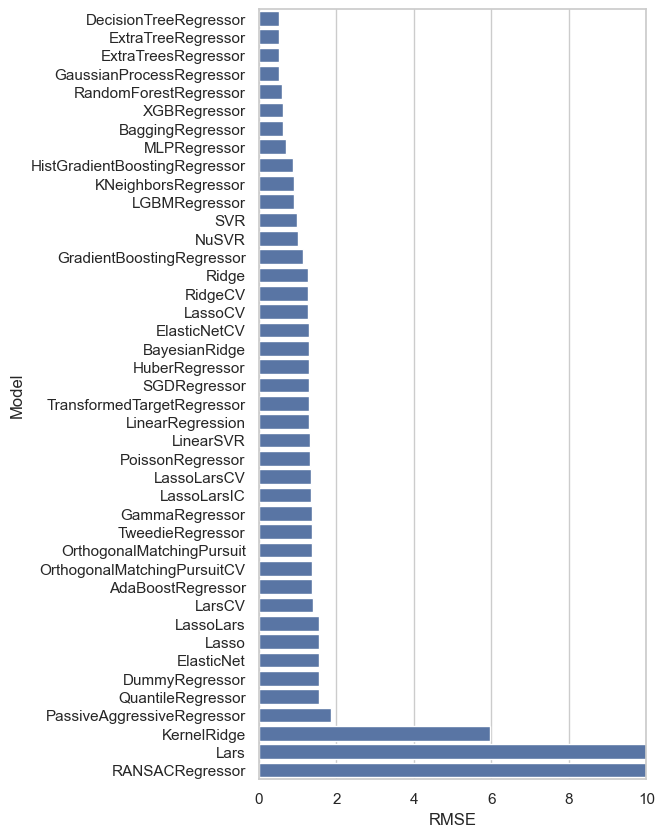

In [24]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

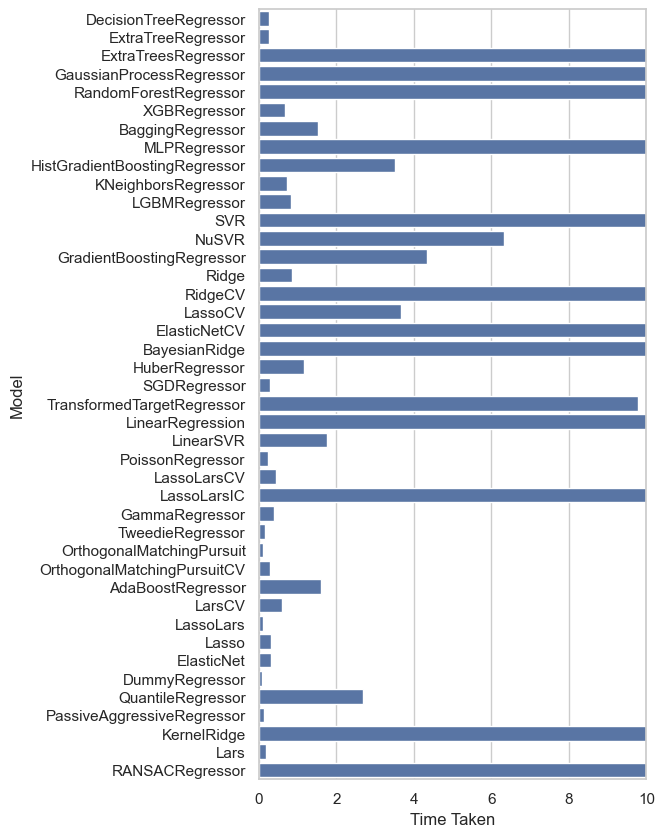

In [25]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))